# **Coffe Shop Sales Analysis**

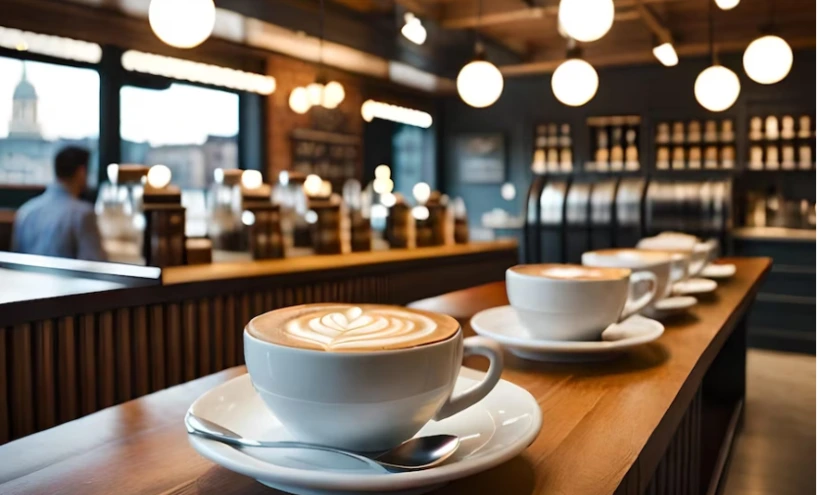

**Name : Zainab Nadeem**\
**Domain : Data Science**\
**Email: zaininadm@gmail.com**

## **Table of Contents**

1. Introduction
2. Dataset Description
3. Data Cleaning
4. Profit / Loss Analysis
5. Profit Increase Prediction
6. Loss Mitigation


## **1. Introduction**

#### Project Overview

This project aims to analyze the sales data of a coffee shop to identify profitable and loss-making products, predict potential profit increases, and propose strategies to mitigate losses and enhance profitability.

#### Objectives
1. Clean and preprocess the dataset.
2. Analyze profit and loss for different products.
3. Use machine learning to predict factors affecting profit.
4. Provide actionable recommendations to increase profit and mitigate losses.

## **2. Dataset Description**

The dataset used in this project contains sales data from a coffee shop. It includes information on transaction details, product details, unit prices, transaction quantities, and transaction times.

#### Dataset Attributes
- **transaction_id:** Unique identifier for each transaction.
- **transaction_time:** Time of the transaction.
- **product_detail:** Details of the product sold.
- **transaction_qty:** Quantity of the product sold in the transaction.
- **unit_price:** Unit price of the product.
- **total_sales:** Calculated as unit_price * transaction_qty (added during analysis).

## **3. DATA CLEANING**

#### **Loading the Dataset**

The dataset is loaded using 'pandas' :

In [1]:
import pandas as pd
df = pd.read_excel('Coffee Shop Sales.xlsx')

C:\Users\{ AZAN Laptops }\AppData\Local\Temp\ipykernel_14112\3433821413.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### **Basic Information**

Basic information about the dataset is obtained using:

In [2]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [2]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB
None
(149116, 11)


In [3]:
df.describe

<bound method NDFrame.describe of         transaction_id transaction_date transaction_time  transaction_qty  \
0                    1       2023-01-01         07:06:11                2   
1                    2       2023-01-01         07:08:56                2   
2                    3       2023-01-01         07:14:04                2   
3                    4       2023-01-01         07:20:24                1   
4                    5       2023-01-01         07:22:41                2   
...                ...              ...              ...              ...   
149111          149452       2023-06-30         20:18:41                2   
149112          149453       2023-06-30         20:25:10                2   
149113          149454       2023-06-30         20:31:34                1   
149114          149455       2023-06-30         20:57:19                1   
149115          149456       2023-06-30         20:57:19                2   

        store_id   store_location  produc

#### **Data Cleaning Steps**

**1. Null Values:** Checking for and handling null values:

In [4]:
# Checking for null values
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

**2. Duplicate Values:** Identifying and removing duplicate values:

In [5]:
# Checking for duplicate values
duplicates = df.duplicated().sum()
print("Number of Duplicates:" , duplicates)
cleaned = df.drop_duplicates()

Number of Duplicates: 0


**3. Data Types:** Ensuring correct data types and standardizing formats:

In [6]:
# Checking datatypes of attributes
print(df.dtypes)

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object


**4. Type Conversion / Standardize format:**

In [7]:
# Convert all non-string values in object columns to strings
for col in cleaned.select_dtypes(include=['object']).columns:
    cleaned[col] = cleaned[col].astype(str)

In [8]:
# To remove unnecessary spaces at the beg and end of string
for col in cleaned.select_dtypes(include=['object']).columns:
    cleaned[col] = cleaned[col].str.strip()

In [9]:
# Convert 'transaction_time' to proper time format
cleaned['transaction_time'] = pd.to_datetime(cleaned['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time

In [10]:
# Display cleaned data info again to ensure all changes are applied
print(cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB
None


#### **Saving the Cleaned Dataset**

The cleaned dataset is saved for further analysis:

In [ ]:
# Save the cleaned dataset for further analysis
cleaned.to_excel("Cleaned_dataset.xlsx", index=False)

## **4. Profit / Loss Analysis**

#### **Total Sales Calculation**

Total sales for each product are calculated:

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_excel('Cleaned_dataset.xlsx')

# Calculate total sales for each product
df['total_sales'] = df['unit_price'] * df['transaction_qty']


In [14]:
# to check does total sales column has been made or not
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


#### **Visualizing Sales**

Total sales by product are visualized using a horizontal bar chart:

In [15]:
# Group by product_detail and calculate total sales
product_sales = df.groupby('product_detail')['total_sales'].sum()

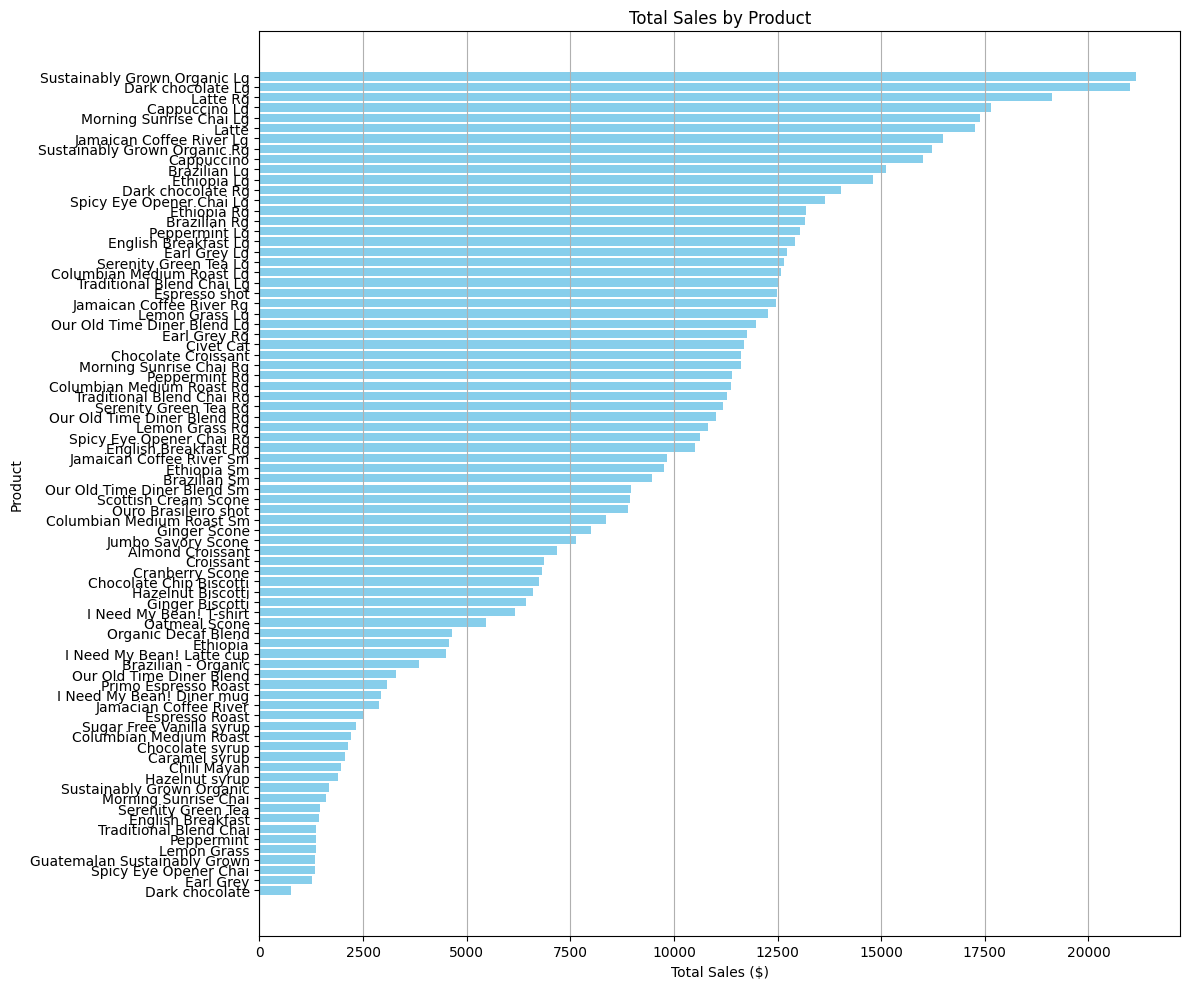

In [16]:
# Sort product_sales for better visualization
product_sales = product_sales.sort_values()

# Plotting total sales by product detail 
plt.figure(figsize=(12, 10))
bars = plt.barh(product_sales.index, product_sales, color='skyblue')

# Adding labels
plt.title('Total Sales by Product')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product')
plt.grid(axis='x')


plt.tight_layout()
plt.show()

#### **Profit Analysis**

Summarized view of sales performance for each product and identification of profitable products:

In [17]:
#  summarized view of sales performance for each product 
product_summary = df.groupby('product_detail').agg({
    'transaction_qty': 'sum',
    'unit_price': 'mean',
    'total_sales': 'sum'
}).reset_index()

In [18]:
# Calculate profit
product_summary['profit'] = product_summary['total_sales'] - (product_summary['transaction_qty'] * product_summary['unit_price'])

In [19]:
product_summary.head(15)

,product_detail,transaction_qty,unit_price,total_sales,profit
0,Almond Croissant,1911,3.750988,7168.13,-0.007903
1,Brazilian - Organic,214,18.000000,3852.00,0.000000
2,Brazilian Lg,4317,3.500000,15109.50,0.000000
3,Brazilian Rg,4385,3.000000,13155.00,0.000000
4,Brazilian Sm,4310,2.200000,9482.00,0.000000
5,Cappuccino,4266,3.750000,15997.50,0.000000
6,Cappuccino Lg,4151,4.250000,17641.75,0.000000
7,Caramel syrup,2576,0.800000,2060.80,0.000000
8,Chili Mayan,148,13.330000,1972.84,0.000000
9,Chocolate Chip Biscotti,1924,3.507911,6748.96,-0.261068


In [20]:
profitable_products = product_summary[product_summary['profit'] > 0]

# Display the results
print("Products generating profit:")
print(profitable_products[['product_detail', 'profit']])

Products generating profit:
          product_detail        profit
38        Hazelnut syrup  2.273737e-13
61  Ouro Brasileiro shot  1.071316e+02


### **Visualizing profitable products**

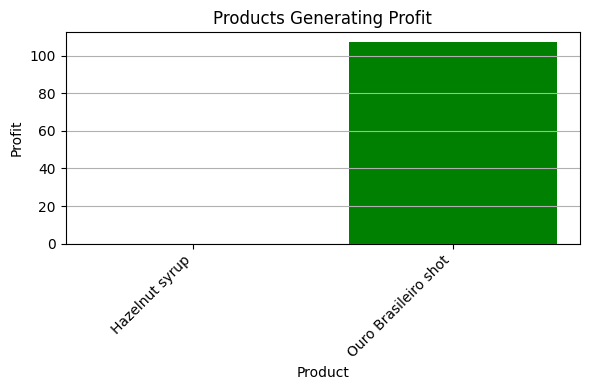

In [21]:
# Plotting bar chart for products generating profit
plt.figure(figsize=(6, 4))
bars = plt.bar(profitable_products['product_detail'], profitable_products['profit'], color='green')

# Adding labels and titles
plt.title('Products Generating Profit')
plt.xlabel('Product')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


#### **Loss Analysis**

Identifying and visualizing loss-making products:

In [22]:
loss_products = product_summary[product_summary['profit'] < 0]

print("\nProducts incurring losses:")
print(loss_products[['product_detail', 'profit']])


Products incurring losses:
               product_detail        profit
0            Almond Croissant -7.903311e-03
9     Chocolate Chip Biscotti -2.610682e-01
10        Chocolate Croissant -1.039012e-01
17            Cranberry Scone -1.403948e-01
18                  Croissant -2.485670e-01
34            Ginger Biscotti -1.457758e-01
35               Ginger Scone -7.574344e+01
37          Hazelnut Biscotti -1.608711e-01
39  I Need My Bean! Diner mug -4.459459e+00
40  I Need My Bean! Latte cup -3.582237e+00
46         Jumbo Savory Scone -2.153386e-01
66       Scottish Cream Scone -2.865523e-01
73   Sugar Free Vanilla syrup -4.547474e-13


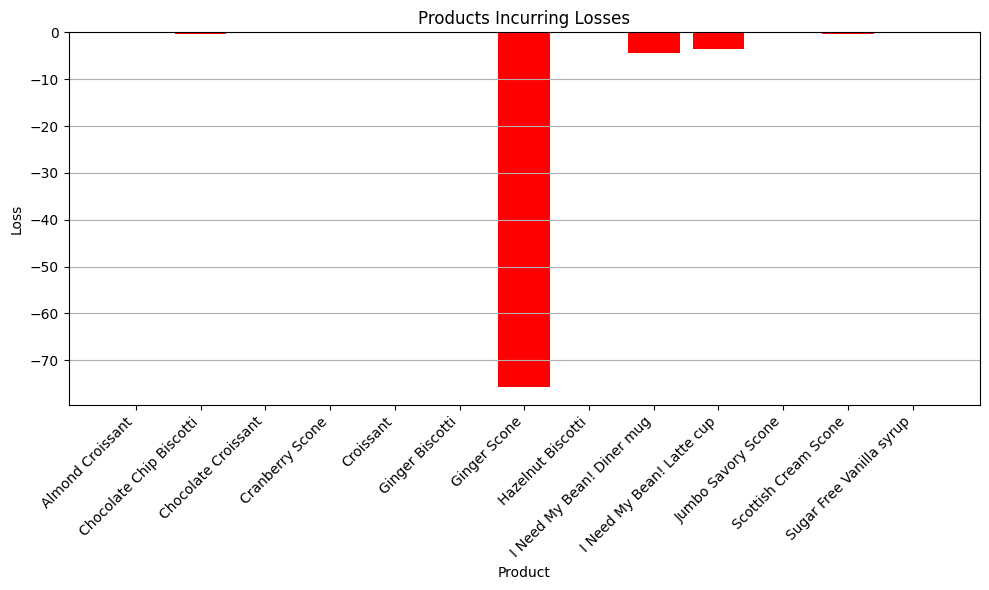

In [23]:
# Plotting bar chart for products incurring losses
plt.figure(figsize=(10, 6))
bars = plt.bar(loss_products['product_detail'], loss_products['profit'], color='red')

# Adding labels and titles
plt.title('Products Incurring Losses')
plt.xlabel('Product')
plt.ylabel('Loss')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')


plt.tight_layout()
plt.show()


 ## **5. Profit Increase Prediction**

#### **Random Forest Model**

Applying a Random Forest model to predict potential profit increases:

In [24]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
df = pd.read_excel('Cleaned_dataset.xlsx')

# Calculate total amount for each transaction
df['total_amount'] = df['transaction_qty'] * df['unit_price']

# Prepare data for predictive modeling
X = df[['transaction_qty', 'unit_price']]
y = df['total_amount']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
# Make predictions
y_pred = rf_model.predict(X_test)

#### **Feature Importance**

Analyzing feature importances:

           Feature  Importance
0  transaction_qty    0.607848
1       unit_price    0.392152


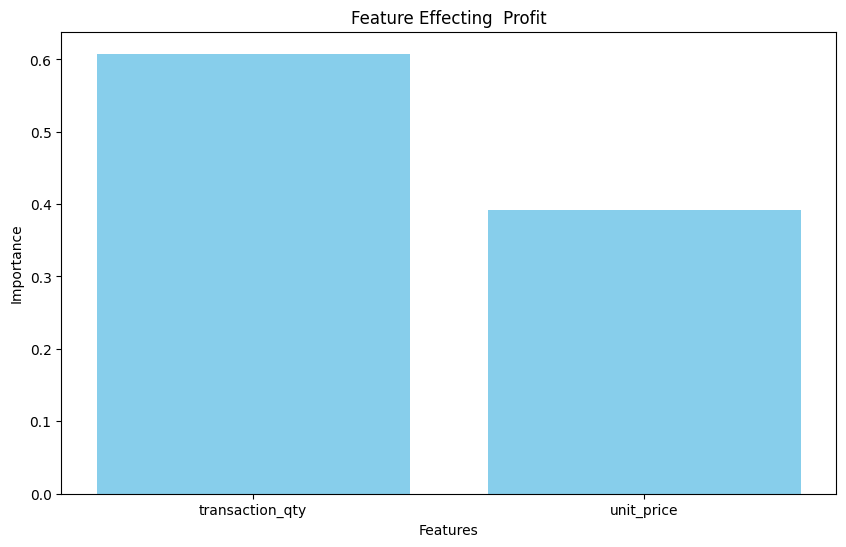

In [26]:
# Explore factors contributing to profitability
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Effecting  Profit')
plt.show()

#### **Recommendations on Strategies to increase Profit**

In [32]:
# Recommendations based on feature importances
significant_features = importance_df[importance_df['Importance'] > 0.05]['Feature'].tolist()

for feature in significant_features:
    if feature == 'transaction_qty':
        print("Increasing transaction quantities could potentially increase total sales.")
    elif feature == 'unit_price':
        print("Optimizing unit prices based on market demand and competition may improve profit margins.")
   

Increasing transaction quantities could potentially increase total sales.
Optimizing unit prices based on market demand and competition may improve profit margins.


### **Recommendations:**<br>
1- Focus marketing efforts on products with high profitability.<br>
2- Adjust prices based on profitability insights and market demand. <br>
3- Regularly analyze sales data and adjust strategies based on performance.<br>
4- Introduce new products or services that align with customer preferences.<br>
5-  Improve service quality to retain customers and encourage repeat business.


### **Products That can Increase Profit**

In [28]:
# Identify products with the highest potential for profit increase based on predictions
predicted_profit_increase = rf_model.predict(X) - y
predicted_profit_df = df.copy()
predicted_profit_df['predicted_profit_increase'] = predicted_profit_increase

In [29]:
# Sort by predicted profit increase
predicted_profit_df = predicted_profit_df.sort_values(by='predicted_profit_increase', ascending=False)

print("Products with the highest potential for profit increase:")
print(predicted_profit_df[['product_detail', 'predicted_profit_increase']].head(10))

Products with the highest potential for profit increase:
              product_detail  predicted_profit_increase
76224   Primo Espresso Roast               3.552714e-14
130808  Primo Espresso Roast               3.552714e-14
24648   Primo Espresso Roast               3.552714e-14
130797  Primo Espresso Roast               3.552714e-14
95976   Primo Espresso Roast               3.552714e-14
48522   Primo Espresso Roast               3.552714e-14
138205  Primo Espresso Roast               3.552714e-14
121070  Primo Espresso Roast               3.552714e-14
137041  Primo Espresso Roast               3.552714e-14
142466  Primo Espresso Roast               3.552714e-14


## **6. Loss Mittigation**

#### **Identifying Loss Factors**

Factors contributing to losses are identified:

In [ ]:
# Factors contributing to losses
loss_factors = loss_products[['product_detail', 'transaction_qty', 'unit_price', 'total_sales', 'profit']]
print("Factors contributing to losses:\n", loss_factors)

#### **Strategies for Loss Mitigation**

Strategies to minimize or eliminate losses:
1. Implement promotions and discounts to boost sales.
2. Re-evaluate and optimize pricing strategies.
3. Improve inventory management to avoid overstocking.
4. Enhance product quality and customer service.
5. Continuously monitor and adjust strategies based on performance data.

In [36]:
# Strategies to minimize losses
loss_strategies = []

for idx, row in loss_products.iterrows():
    strategies = f"To minimize losses for {row['product_detail']}: "
    if row['transaction_qty'] > 0:
        strategies += "Consider reducing transaction quantities. "
    if row['unit_price'] > 0:
        strategies += "Reevaluate pricing strategies. "
    if row['total_sales'] < 0:
        strategies += "Enhance marketing efforts to boost sales. "
    loss_strategies.append(strategies)

for strategy in loss_strategies:
    print(strategy)

To minimize losses for Almond Croissant: Consider reducing transaction quantities. Reevaluate pricing strategies. 
To minimize losses for Chocolate Chip Biscotti: Consider reducing transaction quantities. Reevaluate pricing strategies. 
To minimize losses for Chocolate Croissant: Consider reducing transaction quantities. Reevaluate pricing strategies. 
To minimize losses for Cranberry Scone: Consider reducing transaction quantities. Reevaluate pricing strategies. 
To minimize losses for Croissant: Consider reducing transaction quantities. Reevaluate pricing strategies. 
To minimize losses for Ginger Biscotti: Consider reducing transaction quantities. Reevaluate pricing strategies. 
To minimize losses for Ginger Scone: Consider reducing transaction quantities. Reevaluate pricing strategies. 
To minimize losses for Hazelnut Biscotti: Consider reducing transaction quantities. Reevaluate pricing strategies. 
To minimize losses for I Need My Bean! Diner mug: Consider reducing transaction qu

#### **Actionable Steps**

Steps to convert loss-making products into profitable ones:

In [ ]:
# Actionable steps for loss-making products
actionable_steps = []

for idx, row in loss_products.iterrows():
    steps = f"To convert {row['product_detail']} into a profitable product: "
    if row['transaction_qty'] > 0:
        steps += "Decrease the number of transactions or improve operational efficiency. "
    if row['unit_price'] > 0:
        steps += "Optimize the pricing strategy. "
    if row['total_sales'] < 0:
        steps += "Increase sales through better marketing and promotions. "
    actionable_steps.append(steps)

for step in actionable_steps:
    print(step)